In [2]:
# =========================
# 1. Imports
# =========================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:

# =========================
# 2. Chargement des données

import pandas as pd
df_for_ml = pd.read_csv("./df_for_ml.csv")

# Nom de la colonne cible (labels)
target_col = "emotion_label"

# Colonnes de features (toutes les colonnes qui commencent par 'f_')
feature_cols = [col for col in df_for_ml.columns if col.startswith("f_")]

X = df_for_ml[feature_cols]        # features (fréquences f_0, f_1, ..., f_119)
y_str = df_for_ml[target_col]      # labels sous forme de texte ("happy", "sad", etc.)


In [9]:

# =========================
# 3. Encodage des labels
# =========================
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_str)  # ex: "calm" -> 0, "happy" -> 1, ...

# =========================
# 4. Split train / test
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y         # pour garder la proportion des classes
)

# =========================
# 5. Définition et entraînement du modèle Naive Bayes
# =========================
# GaussianNB adapté aux features continus (comme tes fréquences)
naive_bayes_model = GaussianNB()

naive_bayes_model.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [10]:

# =========================
# 6. Évaluation sur le set de test
# =========================
y_test_pred = naive_bayes_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy sur le test : {test_accuracy:.3f}\n")

print("Rapport de classification :")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_test_pred))

# =========================
# 7. Prédire sur un nouvel exemple
# =========================
# Exemple : new_instance est un vecteur de la même taille que feature_cols
# (par ex. 120 features f_0..f_119)
# new_instance = [[val_f0, val_f1, ..., val_f119]]

# new_pred_int = naive_bayes_model.predict(new_instance)[0]
# new_pred_label = label_encoder.inverse_transform([new_pred_int])[0]
# print("Émotion prédite :", new_pred_label)


Accuracy sur le test : 0.281

Rapport de classification :
              precision    recall  f1-score   support

       angry       0.43      0.32      0.36        38
        calm       0.45      0.47      0.46        38
     disgust       0.38      0.39      0.39        38
     fearful       0.36      0.26      0.30        39
       happy       0.50      0.03      0.05        39
     neutral       0.12      0.68      0.21        19
         sad       0.00      0.00      0.00        38
   surprised       0.28      0.31      0.29        39

    accuracy                           0.28       288
   macro avg       0.32      0.31      0.26       288
weighted avg       0.33      0.28      0.26       288

Matrice de confusion :
[[12  0  8  2  1  6  1  8]
 [ 0 18  3  0  0 17  0  0]
 [ 8  3 15  0  0 11  0  1]
 [ 4  5  4 10  0  9  0  7]
 [ 2  2  4  7  1 15  1  7]
 [ 0  1  1  0  0 13  0  4]
 [ 2 10  1  3  0 18  0  4]
 [ 0  1  3  6  0 17  0 12]]


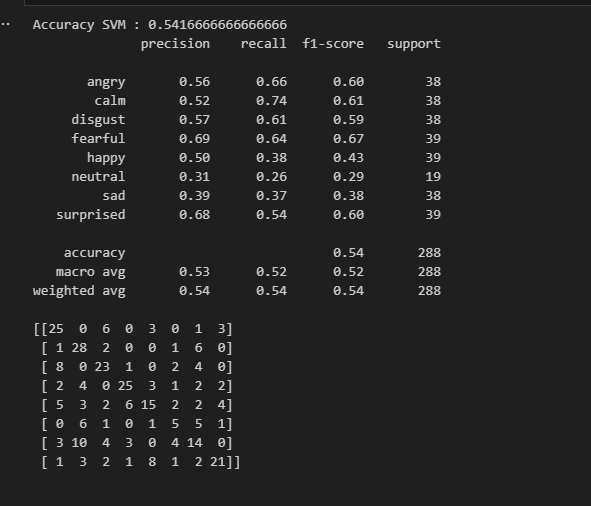